<a href="https://colab.research.google.com/github/Anindita-172/Projects-/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
df = pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
df.shape

(1461, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe

<bound method NDFrame.describe of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

In [7]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='precipitation', ylabel='Density'>

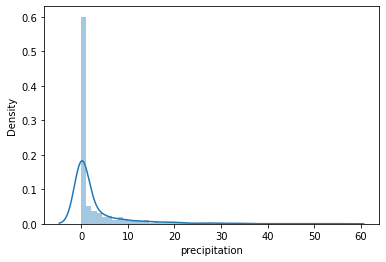

In [8]:
sns.distplot(df['precipitation'])

Count Plot for feature status is shown ↓


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


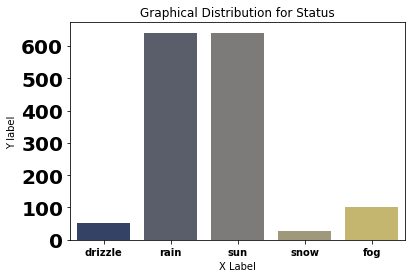

In [9]:
sns.countplot(df['weather'],palette='cividis')
plt.title("Graphical Distribution for Status")
plt.xlabel("X Label")
plt.ylabel("Y label")
plt.xticks(fontweight = 'bold',fontsize = '10')
plt.yticks(fontweight = 'bold',fontsize = '20')
sns.set(rc={'figure.figsize':(5,5)})
print(f'Count Plot for feature status is shown ↓')
plt.show()

<AxesSubplot:xlabel='date', ylabel='precipitation'>

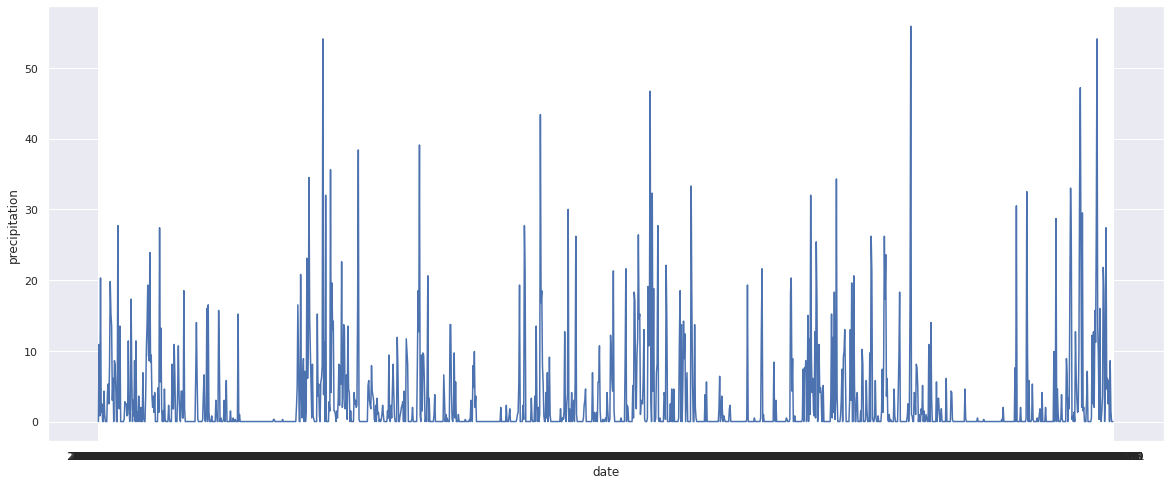

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(x='date',y='precipitation',data=df,ax=ax)

<AxesSubplot:xlabel='date', ylabel='wind'>

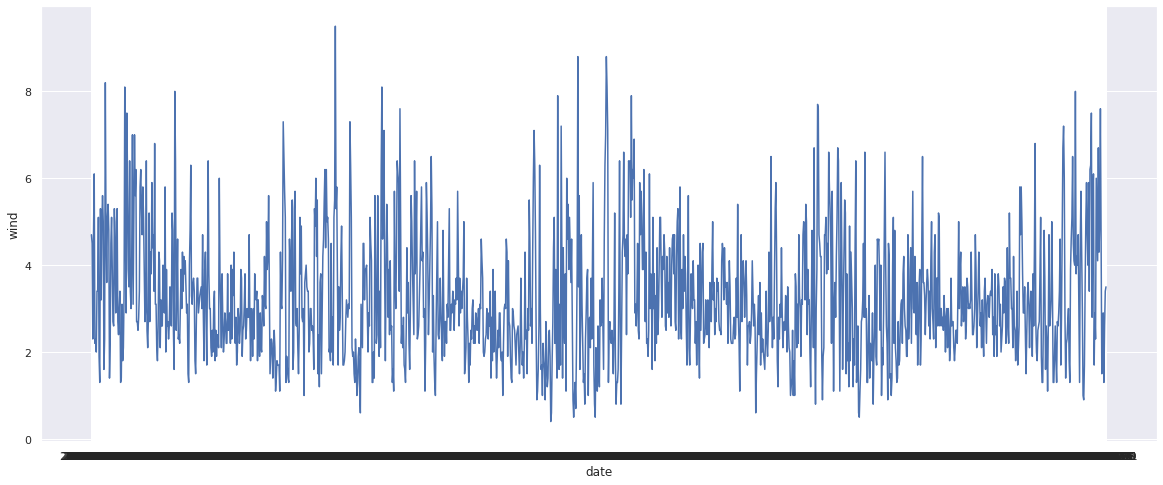

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(x='date',y='wind',data=df,ax=ax)

In [12]:
dict(df['weather'].value_counts())


{'rain': 641, 'sun': 640, 'fog': 101, 'drizzle': 53, 'snow': 26}

<AxesSubplot:xlabel='temp_max', ylabel='precipitation'>

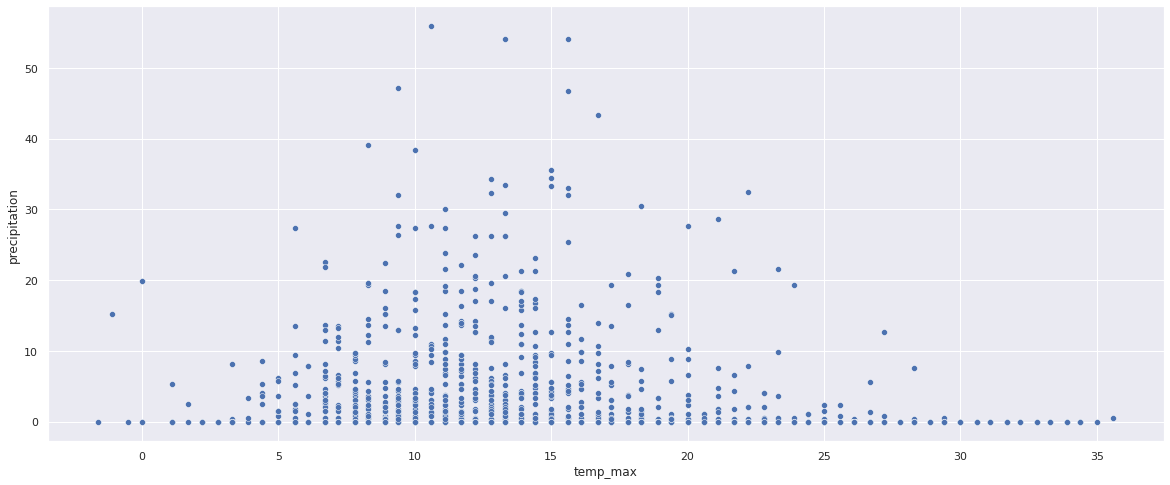

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(x='temp_max',y='precipitation',data=df,ax=ax)

<AxesSubplot:xlabel='temp_min', ylabel='precipitation'>

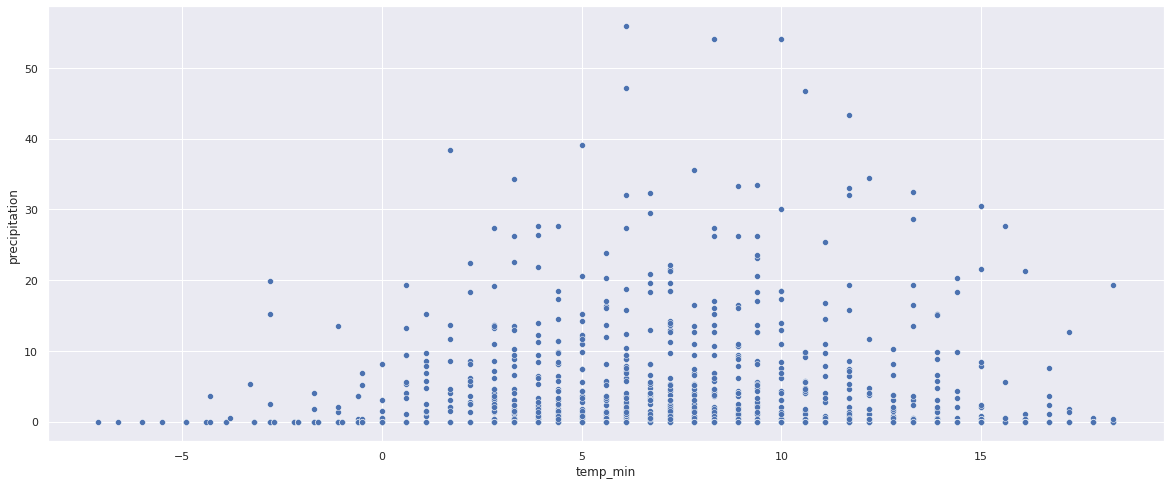

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(x='temp_min',y='precipitation',data=df,ax=ax)

<AxesSubplot:xlabel='weather', ylabel='precipitation'>

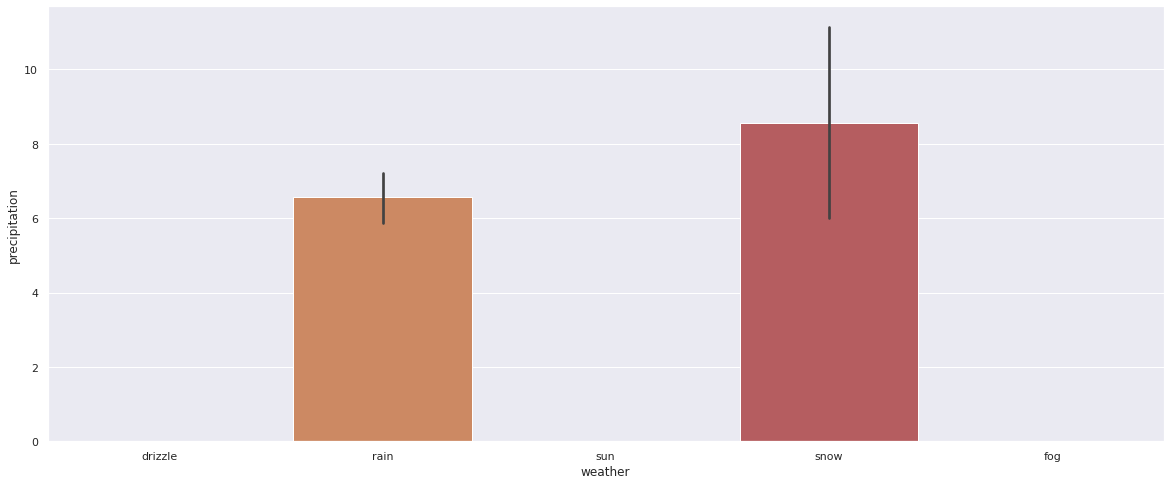

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='weather',y='precipitation',data=df,ax=ax)

<AxesSubplot:xlabel='weather', ylabel='temp_max'>

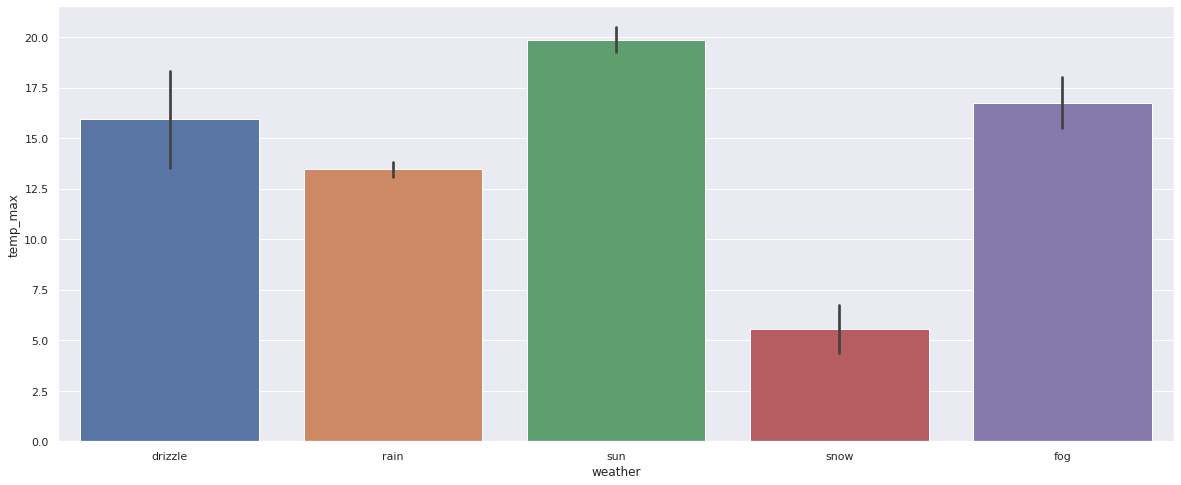

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='weather',y='temp_max',data=df,ax=ax)

<AxesSubplot:xlabel='weather', ylabel='temp_min'>

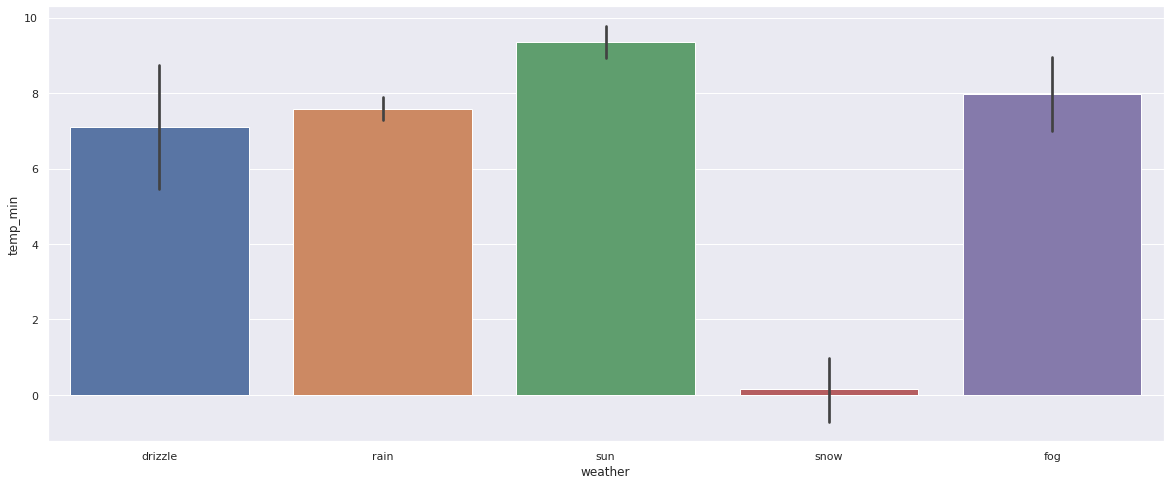

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='weather',y='temp_min',data=df,ax=ax)